In [22]:
from cleaned import ratings_df
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


"""X = ratings_df[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Day_Rated',
             'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
             'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
             'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Reality-TV',
             'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western',
             'movie', 'tvMiniSeries', 'tvMovie', 'tvSeries', 'video', 'videoGame']]"""
X = ratings_df[["IMDb Rating", "Runtime (mins)", "Year", "Num Votes"]]
y = ratings_df['Your Rating']

X = X.dropna() 
y = y[X.index] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
                                            #* Weighted BOOOOM
model = KNeighborsRegressor(n_neighbors=29, weights = "distance") #! There is the option to have this as a classifier (but that's for discrete stuff!)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

Mean Squared Error: 1.2394553262654895
1.0
0.305687912105313


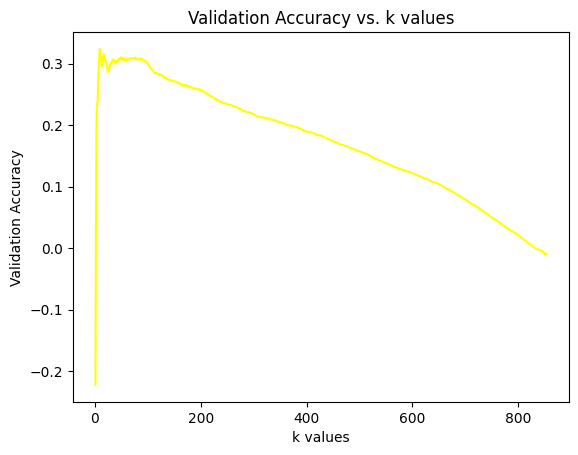

9
0.32393767254057815


In [23]:

#? Graphing the accuracy for diff k's!
def best_k(training_data, training_labels, test_data, test_labels):
    accuracies = []

    for k in range(1, len(training_data)):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(training_data, training_labels)
        accuracy = model.score(test_data, test_labels)
        accuracies.append(accuracy)

    
    best_k_value = np.argmax(accuracies) + 1  # Adding 1 to convert from zero-based index to k value
    best_accuracy = accuracies[best_k_value - 1]  # Using the best_k_value to get the corresponding accuracy

    return best_k_value, best_accuracy, accuracies


k_list = range(1, len(X_train_scaled))
best_k_value, best_accuracy, accuracies2 = best_k(X_train_scaled, y_train, X_test_scaled, y_test) #* Wow everything involving functions and modules just clicked for me here!..


plt.plot(k_list, accuracies2, color="yellow")
plt.xlabel('k values')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. k values')
plt.show()

# print(f"Best k value: {best_k_value}") ===== 29
# print(f"Best accuracy: {best_accuracy}") ==== 0.2667 (That's dog shite)

print(best_k_value)
print(best_accuracy)

#? Ohhh I get it now Why this shit needs to be simplified all code I've done up until this point as run in miliseconds but this took a whopping 12 seconds!